In [1]:

import pandas as pd
import numpy as np
from scipy.stats import boxcox, skew, kurtosis, pearsonr
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:

# ================== LOAD & CLEAN DATA ==================
df = pd.read_csv(r'C:\Users\vicky\Downloads\Population.csv')

# Print dataset info in console
print("Total features in dataset:", df.shape[1])
print("Features present in dataset:", list(df.columns))
print("Total records in dataset:", df.shape[0])   # optional: number of rows

# Clean numeric-like object columns
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].astype(str).str.replace("%", "").str.strip()
        df[col] = pd.to_numeric(df[col], errors="ignore")

# Detect numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns detected:", numeric_cols)


Total features in dataset: 11
Features present in dataset: ['Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']
Total records in dataset: 235
Numeric columns detected: ['Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'World Share']


C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\229863881.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\229863881.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\229863881.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df[col] = pd.to_numeric(df[col], errors="ignore")
C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\229863881.py:13: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numer

In [3]:

# ================== BASIC STATS ==================
mean_results = df[numeric_cols].mean()
median_results = df[numeric_cols].median()
mode_results = {col: df[col].mode().iloc[0] for col in numeric_cols}

print("\n=== Mean ===")
print(mean_results)

print("\n=== Median ===")
print(median_results)

print("\n=== Mode ===")
print(mode_results)



=== Mean ===
Population (2020)    3.322744e+07
Yearly Change        1.104553e+00
Net Change           3.460878e+05
Density (P/Km²)      4.757702e+02
Land Area (Km²)      5.535918e+05
Migrants (net)       6.283582e+00
World Share          4.254468e-01
dtype: float64

=== Median ===
Population (2020)    5460109.00
Yearly Change              0.97
Net Change             39170.00
Density (P/Km²)           95.00
Land Area (Km²)        77240.00
Migrants (net)          -852.00
World Share                0.07
dtype: float64

=== Mode ===
{'Population (2020)': np.int64(801), 'Yearly Change': np.float64(1.48), 'Net Change': np.int64(68), 'Density (P/Km²)': np.int64(25), 'Land Area (Km²)': np.int64(460), 'Migrants (net)': np.float64(0.0), 'World Share': np.float64(0.0)}


In [4]:

# ================== BOX-COX TRANSFORMATION ==================
boxcox_results = {}
transformed_data = {}

for col in numeric_cols:
    data = df[col].dropna()
    data = data[data > 0]  # Box-Cox requires strictly positive values
    
    if len(data) > 0:
        transformed, lmbda = boxcox(data)
        boxcox_results[col] = {"lambda": lmbda, "transformed_sample": transformed[:5]}
        transformed_data[col] = (data, transformed, lmbda)
    else:
        print(f"Skipping {col}: contains non-positive or insufficient values")


In [5]:

# ================== SKEWNESS & KURTOSIS ==================
skewness_results = {col: skew(df[col].dropna()) for col in numeric_cols}
kurtosis_results = {col: kurtosis(df[col].dropna()) for col in numeric_cols}

# ================== PEARSON CORRELATION ==================
pearson_results = {}
for i in range(len(numeric_cols)):
    for j in range(i+1, len(numeric_cols)):
        col1, col2 = numeric_cols[i], numeric_cols[j]
        temp = df[[col1, col2]].dropna()
        if not temp.empty:
            corr, _ = pearsonr(temp[col1], temp[col2])
            pearson_results[f"{col1} vs {col2}"] = corr


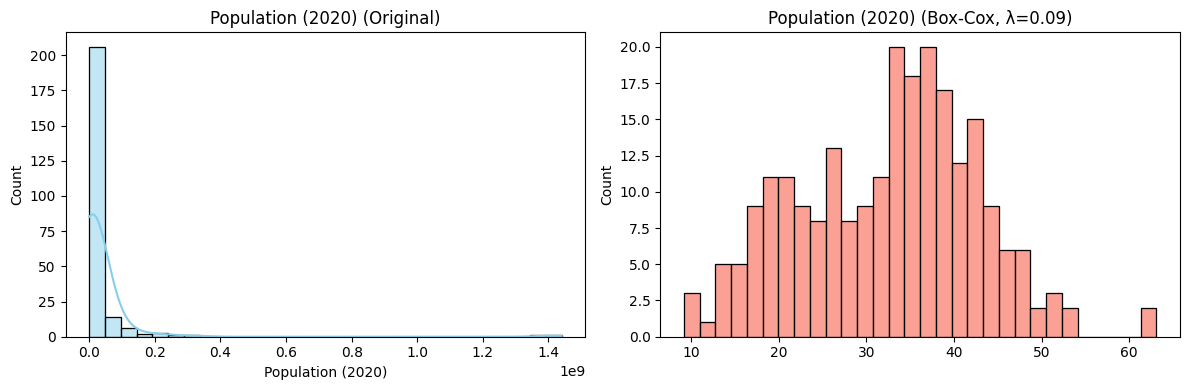

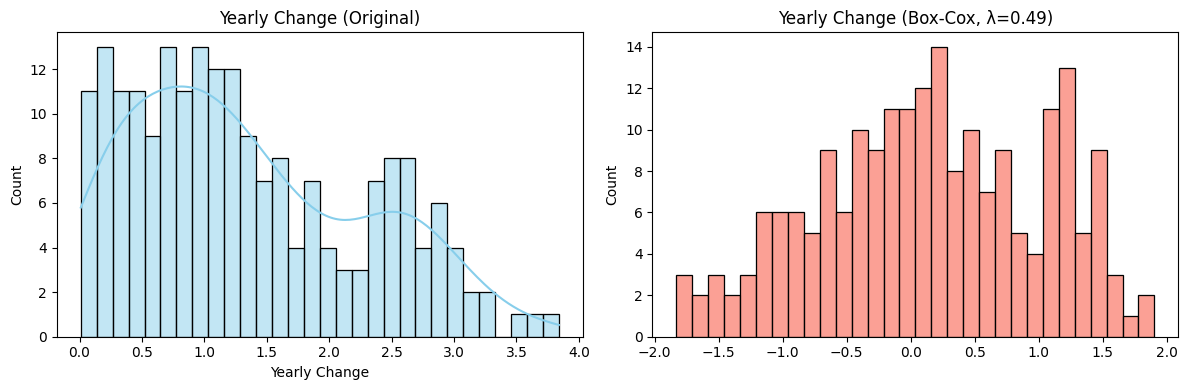

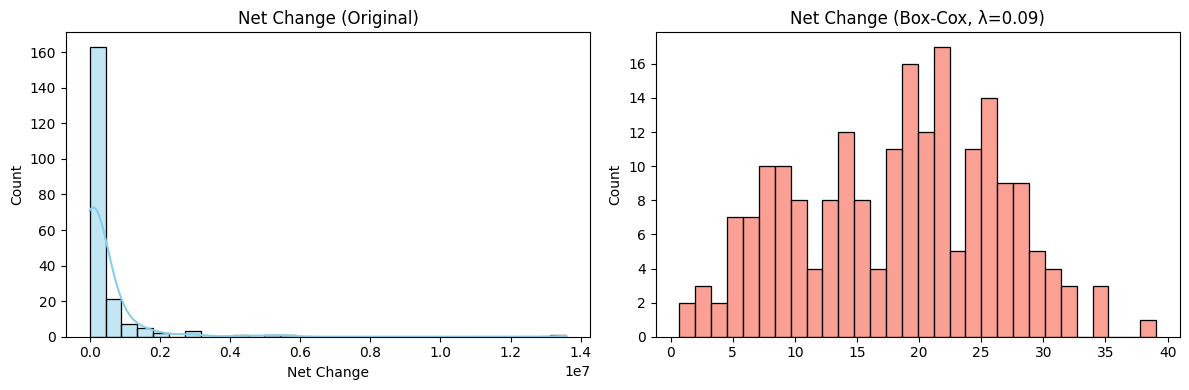

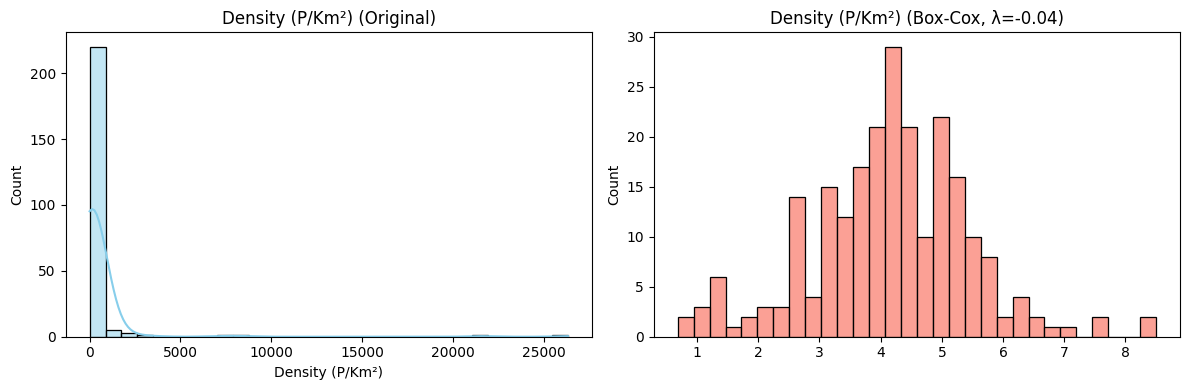

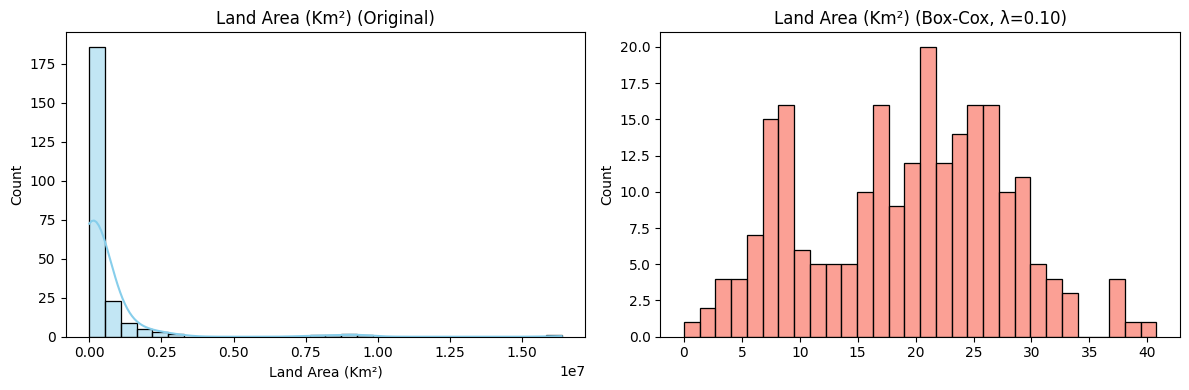

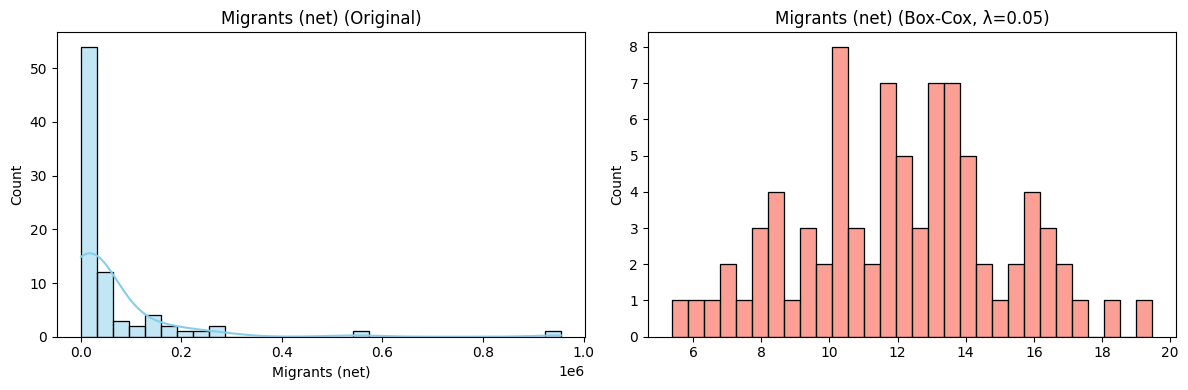

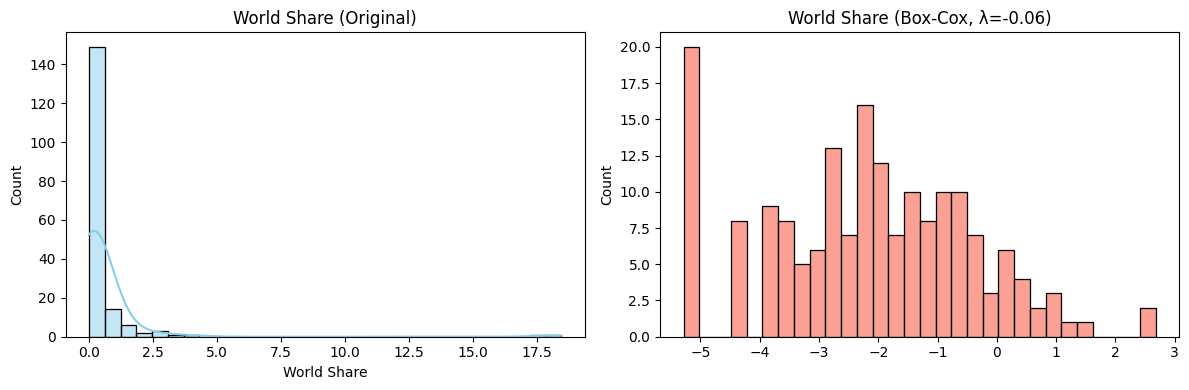

In [6]:

# =========================================================
#  IMAGE 1 : BOX-COX BEFORE VS AFTER (one fig per feature)
# =========================================================
for col, (orig, trans, lmbda) in transformed_data.items():
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    sns.histplot(orig, bins=30, kde=True, ax=axes[0], color="skyblue")
    axes[0].set_title(f"{col} (Original)")

    sns.histplot(trans, bins=30, kde=False, ax=axes[1], color="salmon")
    axes[1].set_title(f"{col} (Box-Cox, λ={lmbda:.2f})")

    plt.tight_layout()
    plt.show()


C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\1762494786.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(skewness_results.keys()), y=list(skewness_results.values()), ax=axes[0], palette="Blues_d")
C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\1762494786.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(kurtosis_results.keys()), y=list(kurtosis_results.values()), ax=axes[1], palette="Greens_d")
C:\Users\vicky\AppData\Local\Temp\ipykernel_10608\1762494786.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(

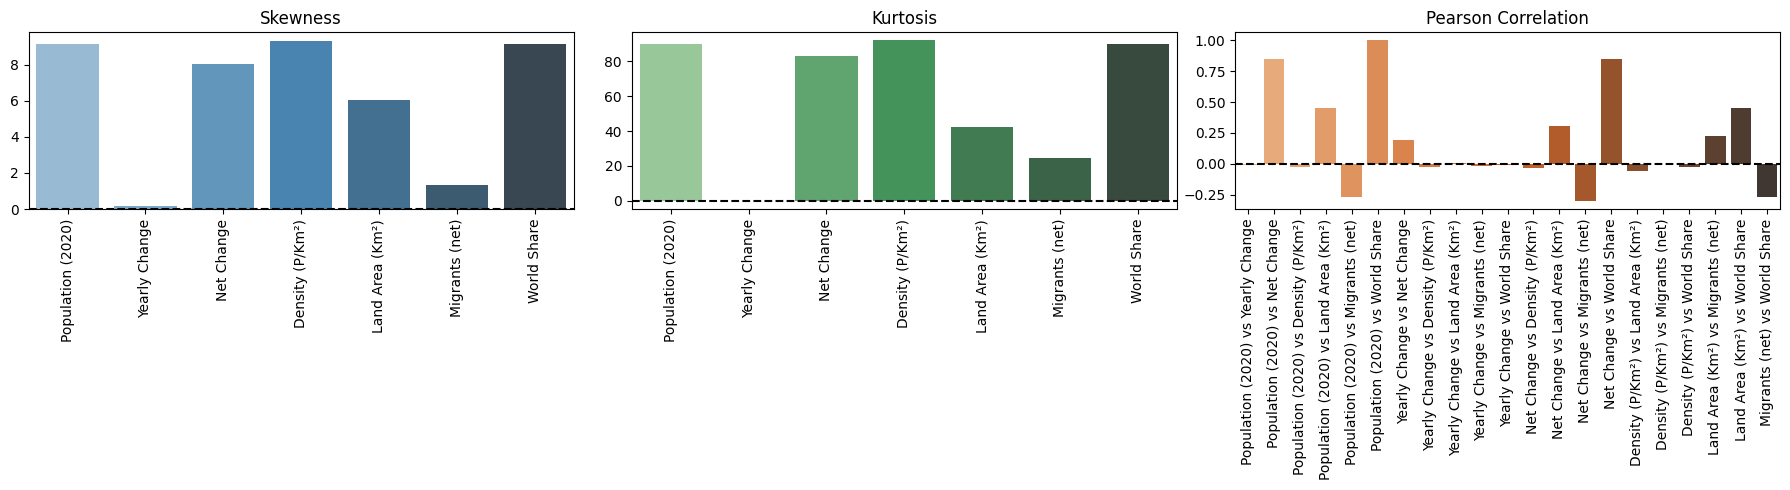

In [7]:

# =========================================================
#  IMAGE 2 : SKEWNESS, KURTOSIS, PEARSON (combined but clean)
# =========================================================
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Skewness
sns.barplot(x=list(skewness_results.keys()), y=list(skewness_results.values()), ax=axes[0], palette="Blues_d")
axes[0].axhline(0, color="black", linestyle="--")
axes[0].set_title("Skewness")
axes[0].tick_params(axis='x', rotation=90)

# Kurtosis
sns.barplot(x=list(kurtosis_results.keys()), y=list(kurtosis_results.values()), ax=axes[1], palette="Greens_d")
axes[1].axhline(0, color="black", linestyle="--")
axes[1].set_title("Kurtosis")
axes[1].tick_params(axis='x', rotation=90)

# Pearson Correlation
if pearson_results:
    sns.barplot(x=list(pearson_results.keys()), y=list(pearson_results.values()), ax=axes[2], palette="Oranges_d")
    axes[2].axhline(0, color="black", linestyle="--")
    axes[2].set_title("Pearson Correlation")
    axes[2].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()
